# Customer Churn Prediction - Telecom Dataset

## Project Overview
This project aims to analyze customer data from a telecommunications company to predict **customer churn** — identifying customers who are likely to leave the service. By understanding the factors influencing churn, the company can improve customer retention strategies and customer satisfaction.

## Dataset Source
- **Name:** Telco Customer Churn Dataset
- **Source:** [Telco Customer Churn - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- **Number of Records:** 7,043 customers
- **Number of Features:** 21 columns

## Data Dictionary
| Column Name         | Description                                                                                      |
|--------------------|--------------------------------------------------------------------------------------------------|
| **customerID**      | Unique identifier for each customer.                                                             |
| **gender**          | Gender of the customer — either Male or Female.                                                   |
| **SeniorCitizen**   | Indicates if the customer is a senior citizen (1 = Yes, 0 = No).                                 |
| **Partner**         | Whether the customer has a partner — Yes or No.                                                   |
| **Dependents**      | Whether the customer has dependents — Yes or No.                                                  |
| **tenure**           | Number of months the customer has been with the company.                                          |
| **PhoneService**    | Whether the customer has phone service — Yes or No.                                               |
| **MultipleLines**   | Whether the customer has multiple phone lines — Yes, No, or No phone service.                     |
| **InternetService** | Type of internet service — DSL, Fiber optic, or No internet service.                             |
| **OnlineSecurity**  | Whether the customer subscribes to online security services — Yes, No, or No internet service.    |
| **OnlineBackup**    | Whether the customer subscribes to online backup services — Yes, No, or No internet service.      |
| **DeviceProtection**| Whether the customer subscribes to device protection services — Yes, No, or No internet service.  |
| **TechSupport**     | Whether the customer subscribes to tech support services — Yes, No, or No internet service.       |
| **StreamingTV**     | Whether the customer subscribes to streaming TV services — Yes, No, or No internet service.       |
| **StreamingMovies** | Whether the customer subscribes to streaming movie services — Yes, No, or No internet service.    |
| **Contract**        | Type of contract — Month-to-month, One year, or Two year.                                        |
| **PaperlessBilling**| Whether the customer uses paperless billing — Yes or No.                                          |
| **PaymentMethod**   | Payment method used by the customer — Electronic check, Mailed check, Bank transfer, or Credit card. |
| **MonthlyCharges**  | Monthly charges incurred by the customer.                                                         |
| **TotalCharges**    | Total charges incurred during the customer’s tenure.                                              |
| **Churn**           | Whether the customer churned (left the service) — Yes or No.                                      |

## Project Objectives
- Perform **Exploratory Data Analysis (EDA)** to uncover trends and patterns related to customer churn.
- Identify the **key factors driving customer churn**.
- Build and evaluate **classification models** to predict which customers are likely to churn.
- Provide **business recommendations** to help reduce customer churn and improve retention.

## Tools & Libraries
- **Python**
- **Pandas, NumPy** (Data Manipulation)
- **Matplotlib, Seaborn** (Data Visualization)
- **Scikit-learn** (Machine Learning)

## Project Workflow
1. **Data Understanding & Loading**
2. **Data Cleaning & Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Feature Engineering (if needed)**
5. **Model Training & Evaluation**
6. **Insights & Business Recommendations**


## Importing Libraries

In this section, we import all the necessary libraries required for data loading, exploration, visualization, modeling, and evaluation.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Data Loading and Initial Exploration

In this section, we load the dataset and perform basic data checks to understand its structure, spot potential issues (like missing values), and plan the next steps for data cleaning and preprocessing.


In [14]:
# Load the dataset
url = "C:\\Users\\attafuro\\Desktop\\Customer Churn Prediction\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# First look at the data
print("First 5 Rows of the Dataset:")
display(df.head())

#Basic Info
print("\n Basic Information About the Dataset:")
df.info() 

# Check for missing values
print("\n Missing Values Per Column:")
print(df.isnull().sum())

# Check shape
print(f"\n Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check unique values in each column 
print("\n Unique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    
# Check class distribution (how many churn vs not churn)
print("\n Churn (Target - Churn):")
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)


First 5 Rows of the Dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



 Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pap

## Dataset Overview

The **Telco Customer Churn dataset** contains information on **7,043 customers** from a telecommunications company. Each row represents a customer, and there are **21 columns** capturing a mix of:

- **Demographic information** (e.g., gender, senior citizen status, dependents)
- **Service usage data** (e.g., internet service type, streaming services, tech support)
- **Account details** (e.g., contract type, billing method, monthly charges, total charges)
- **The target variable** — `Churn`, which indicates whether the customer left the service.

### Key Observations

- The dataset is balanced in terms of completeness — no obvious missing values were detected during the initial inspection.
- However, the **`TotalCharges` column is stored as a string** (`object`), meaning it will need to be converted to numeric for analysis.
- Most features are **categorical**, with a few numeric columns like `tenure`, `MonthlyCharges`, and `TotalCharges`.

### Churn Breakdown

- About **26.5% of customers have churned**, while 73.5% have stayed.
- This shows a **moderate class imbalance**, which will need to be considered during modeling.

### Next Steps

- Perform **data cleaning** to handle data types and any hidden issues.
- Conduct **exploratory data analysis (EDA)** to uncover relationships between customer characteristics, services, and churn behavior.
- Build a **predictive model** to classify customers and identify key drivers of churn.


## Cleaning the Data

In [15]:
# Check if there are spaces or empty strings in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Confirm conversion
print(df['TotalCharges'].isnull().sum(), "missing values after conversion")


11 missing values after conversion


In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print(df['TotalCharges'].isnull().sum(), "missing values after filling")


0 missing values after filling


In [17]:
# Check for duplicates across all columns
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [18]:
df = df.drop(columns=['customerID'])

In [22]:
# Columns with "No internet service" or "No phone service"
service_columns = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Consolidate "No internet service" into "No"
for col in service_columns:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

check_unique_values(service_columns)


Unique values in MultipleLines: ['No' 'Yes']
Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['Yes' 'No']
Unique values in DeviceProtection: ['No' 'Yes']
Unique values in TechSupport: ['No' 'Yes']
Unique values in StreamingTV: ['No' 'Yes']
Unique values in StreamingMovies: ['No' 'Yes']


# Exploratory Data Analysis

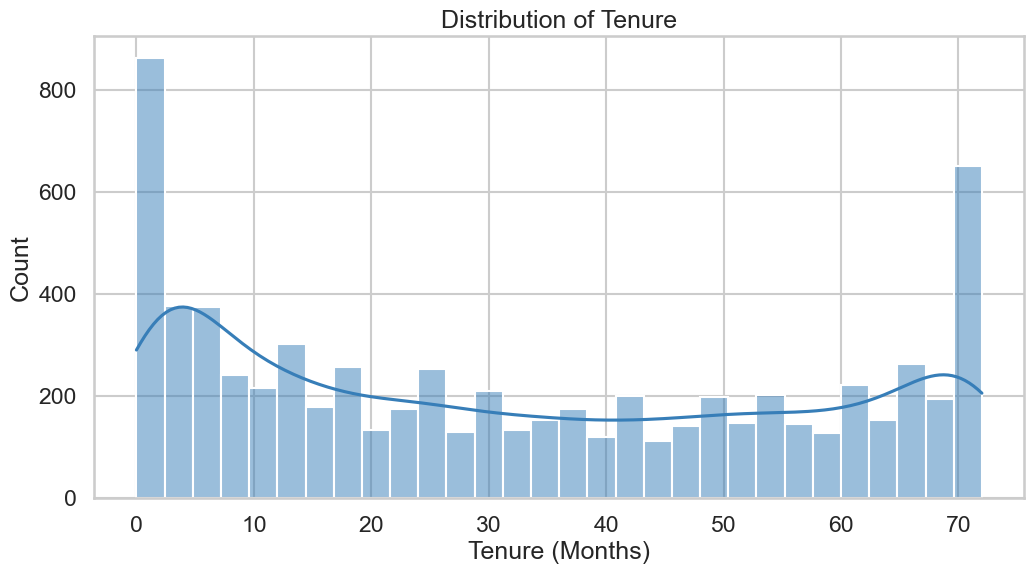

In [25]:
# Set colorblind-friendly style
sns.set(style="whitegrid", context="talk")

# Tenure Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['tenure'], kde=True, color='#377eb8', bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

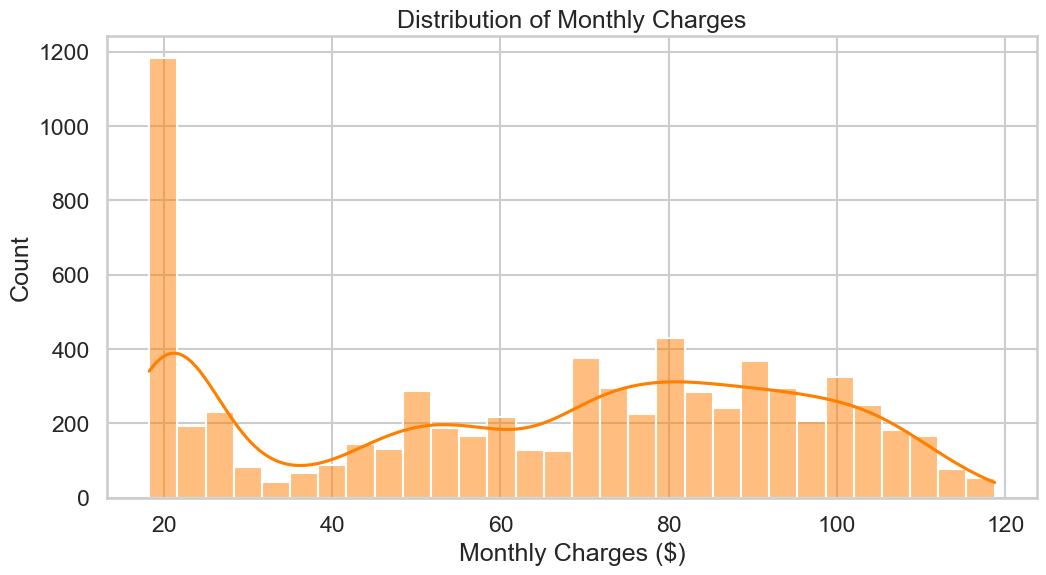

In [26]:
# Set colorblind-friendly style
sns.set(style="whitegrid", context="talk")

# MonthlyCharges Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True, color='#ff7f00', bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()


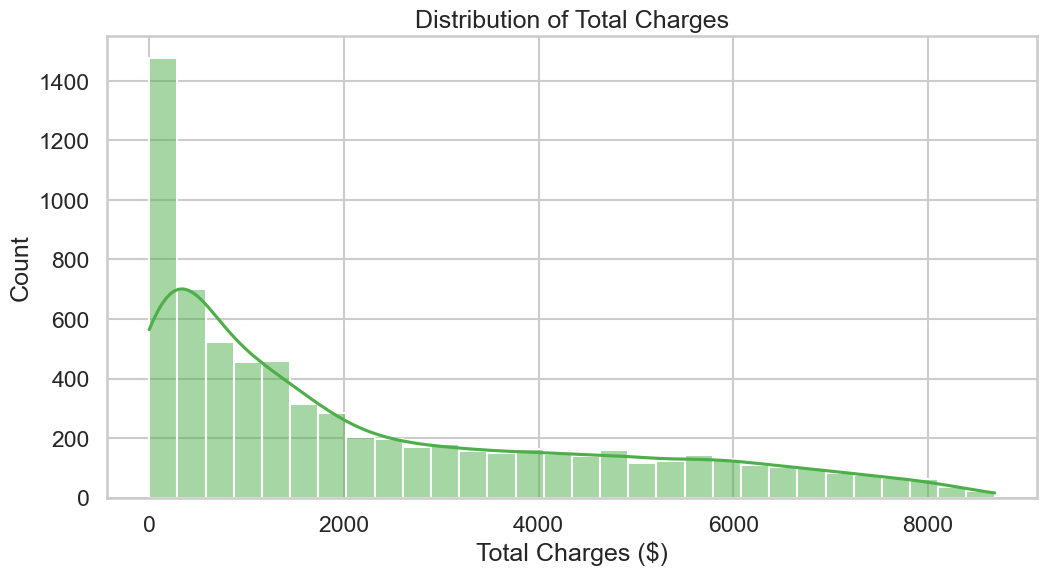

In [27]:
# Set colorblind-friendly style
sns.set(style="whitegrid", context="talk")

# TotalCharges Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalCharges'], kde=True, color='#4daf4a', bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Count')
plt.show()

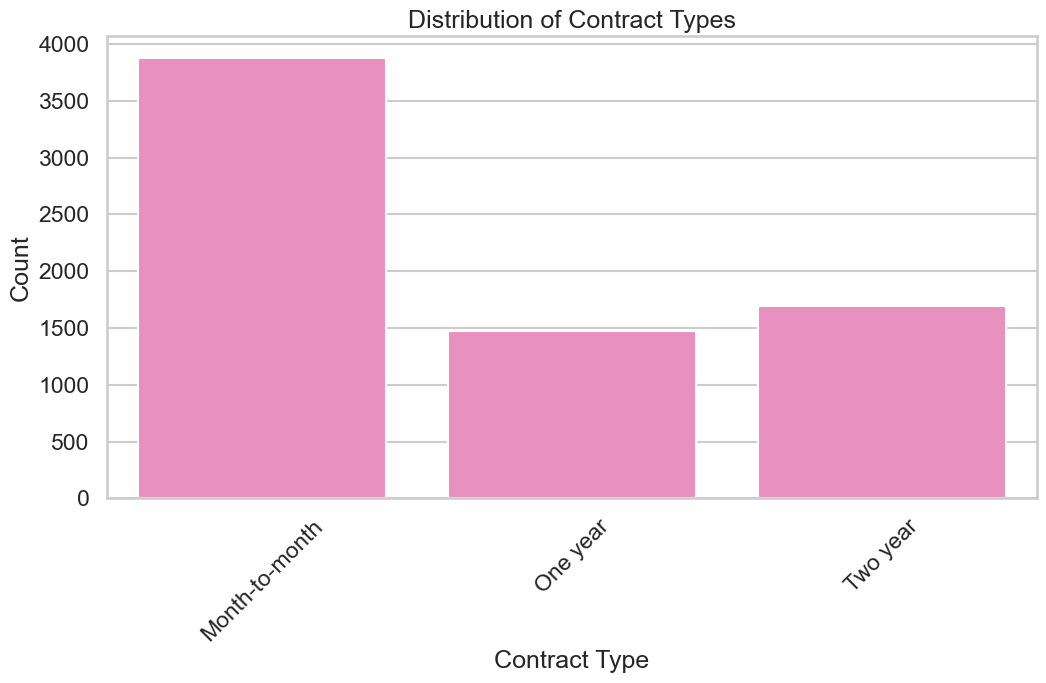

In [35]:
# Contract
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', data=df,color='#f781bf')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

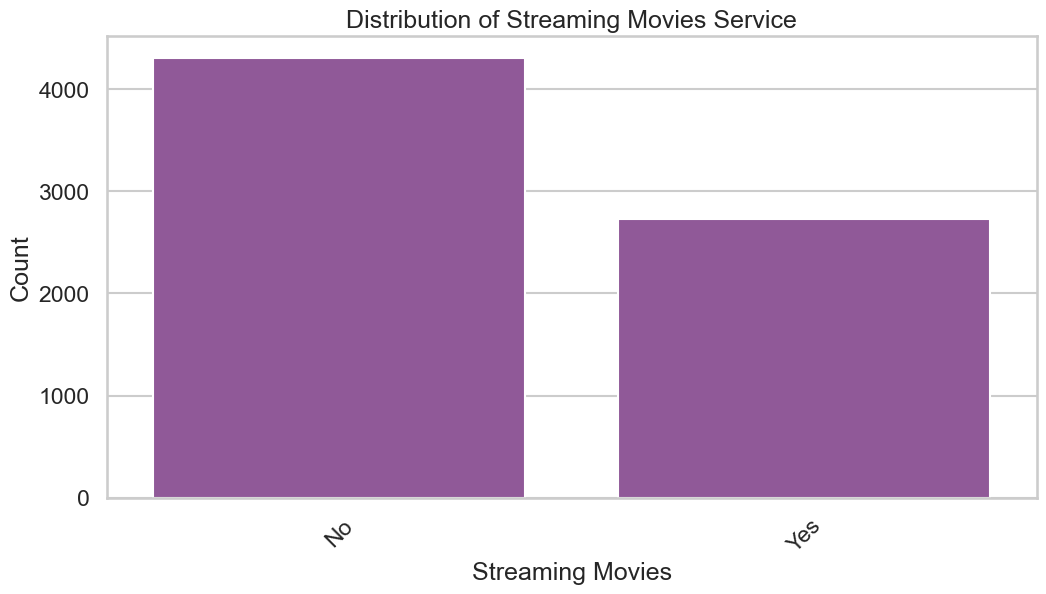

In [36]:
# StreamingMovies
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingMovies', data=df, color = '#984ea3' )
plt.title('Distribution of Streaming Movies Service')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

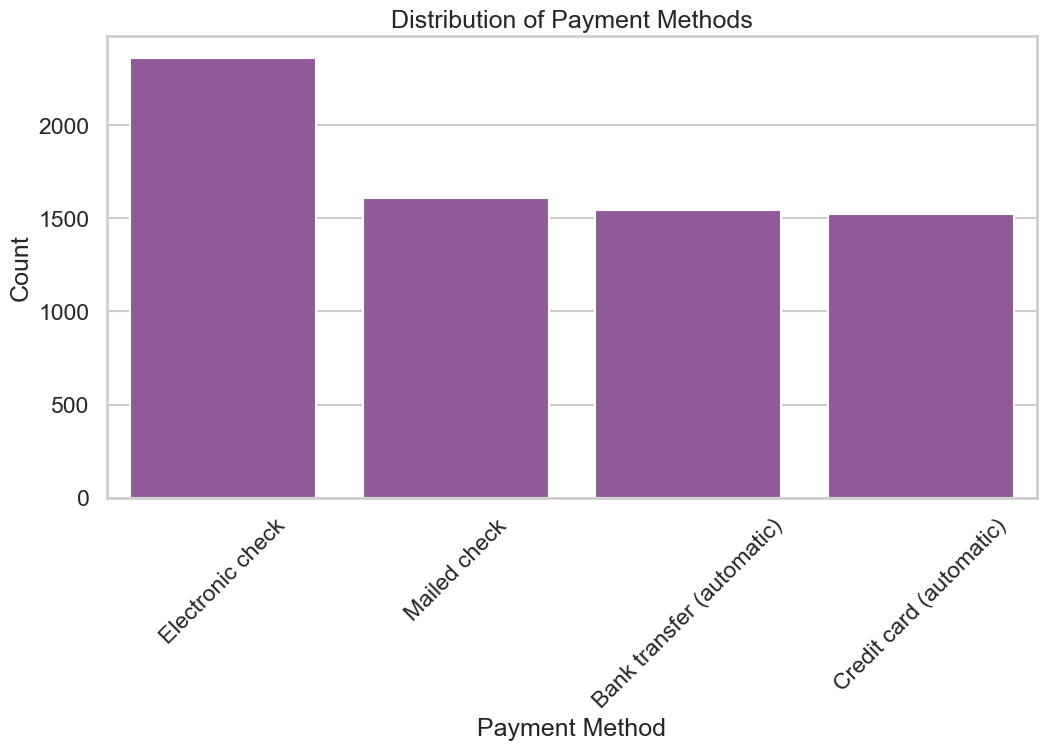

In [37]:
# PaymentMethod
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', data=df, color ='#984ea3')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


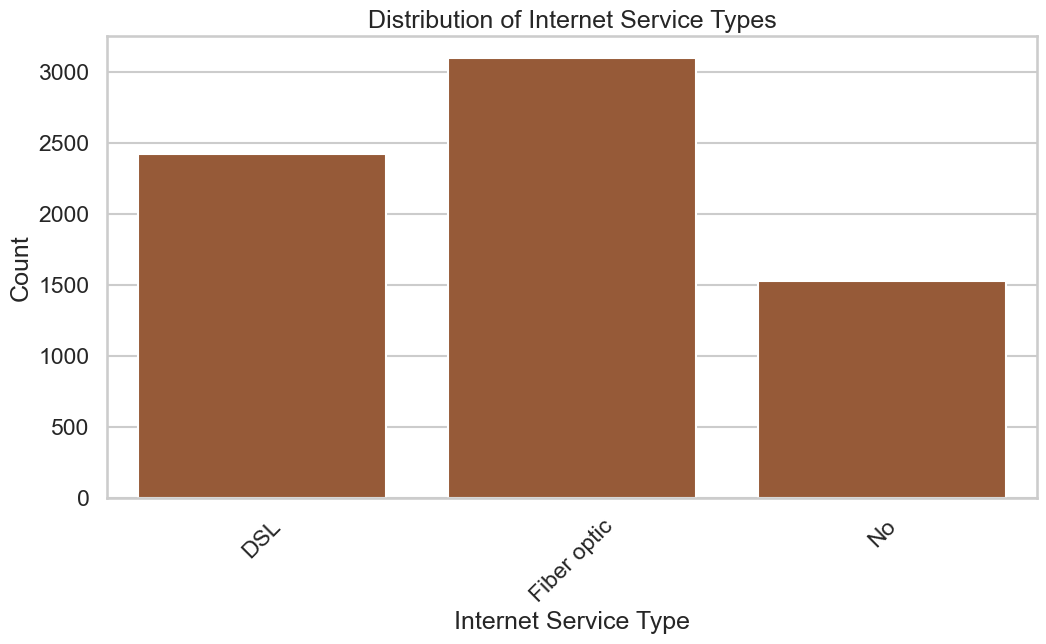

In [38]:
# InternetService
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', data=df, color='#a65628')
plt.title('Distribution of Internet Service Types')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

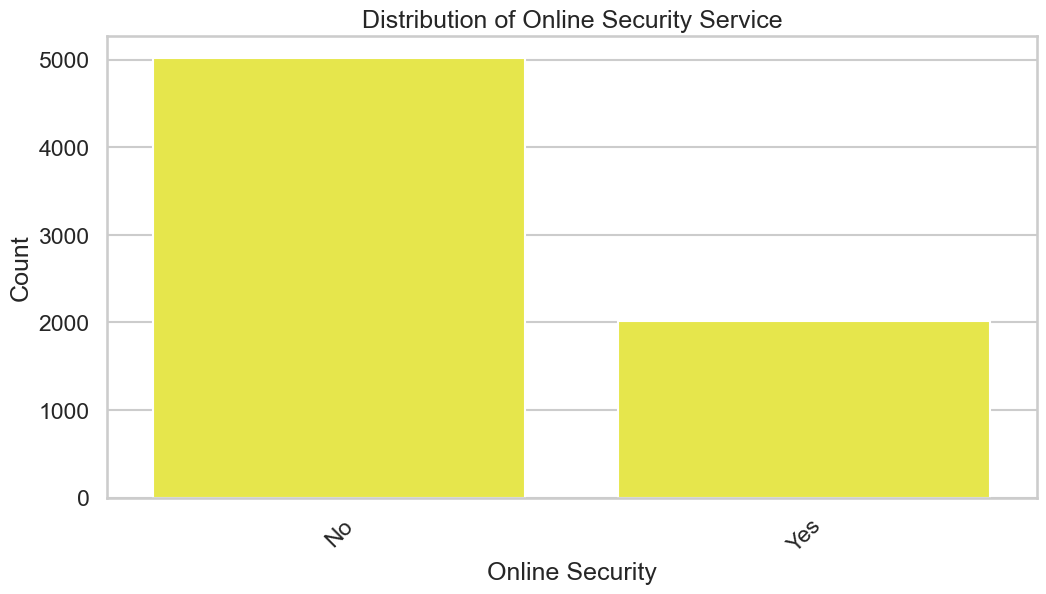

In [39]:
# OnlineSecurity
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineSecurity', data=df, color='#ffff33')
plt.title('Distribution of Online Security Service')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



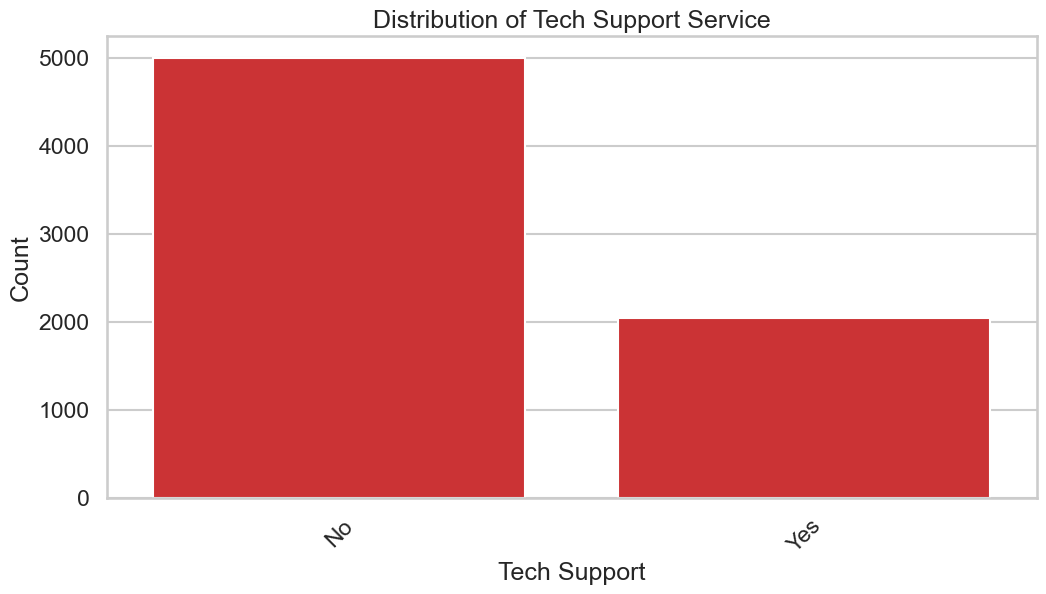

In [40]:
# TechSupport
plt.figure(figsize=(12, 6))
sns.countplot(x='TechSupport', data=df, color ='#e41a1c')
plt.title('Distribution of Tech Support Service')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

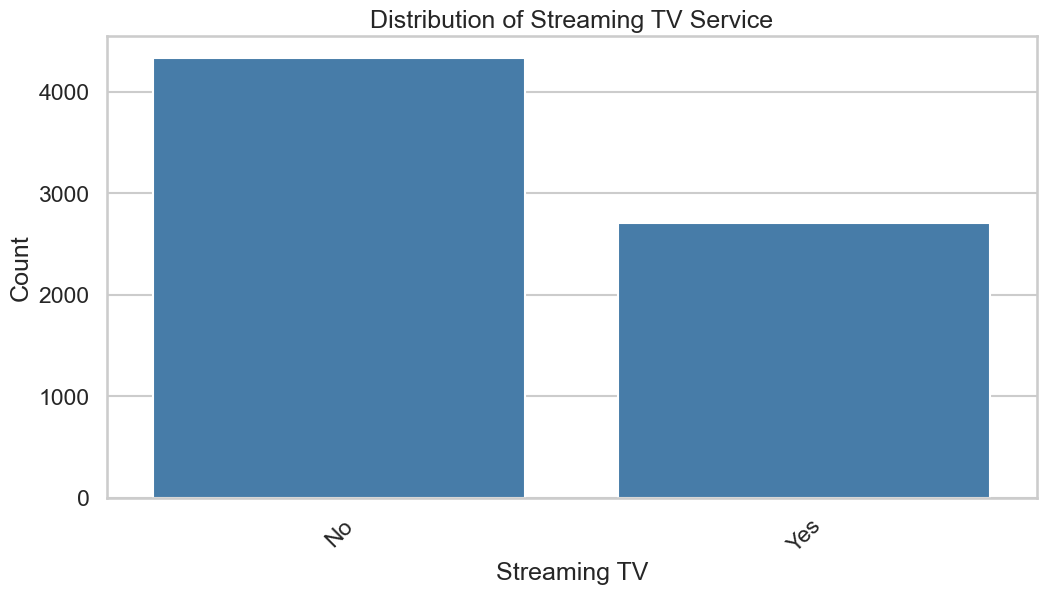

In [41]:
# StreamingTV
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingTV', data=df, color ='#377eb8')
plt.title('Distribution of Streaming TV Service')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

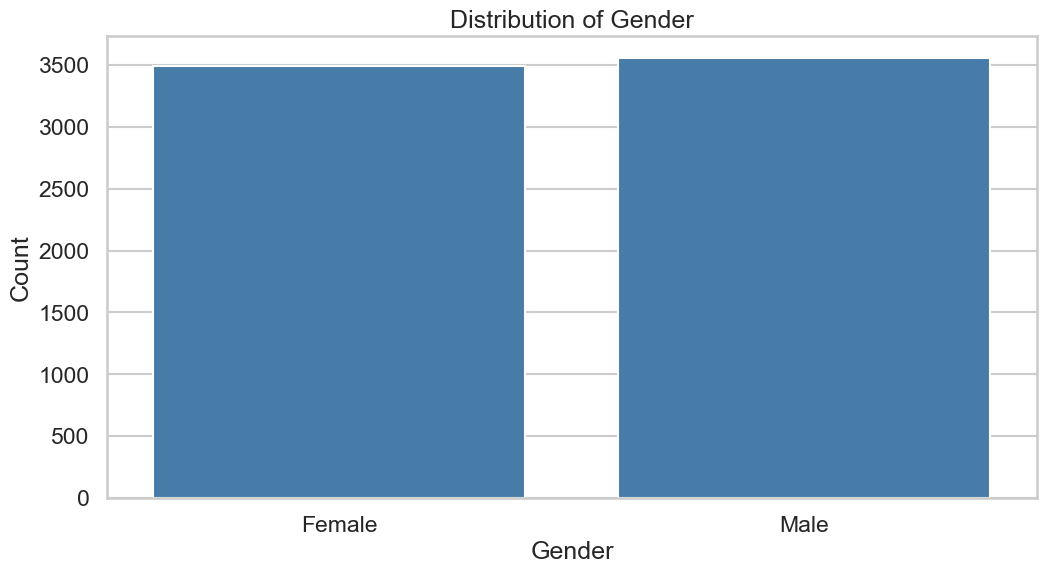

In [43]:
# Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=df, color='#377eb8')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

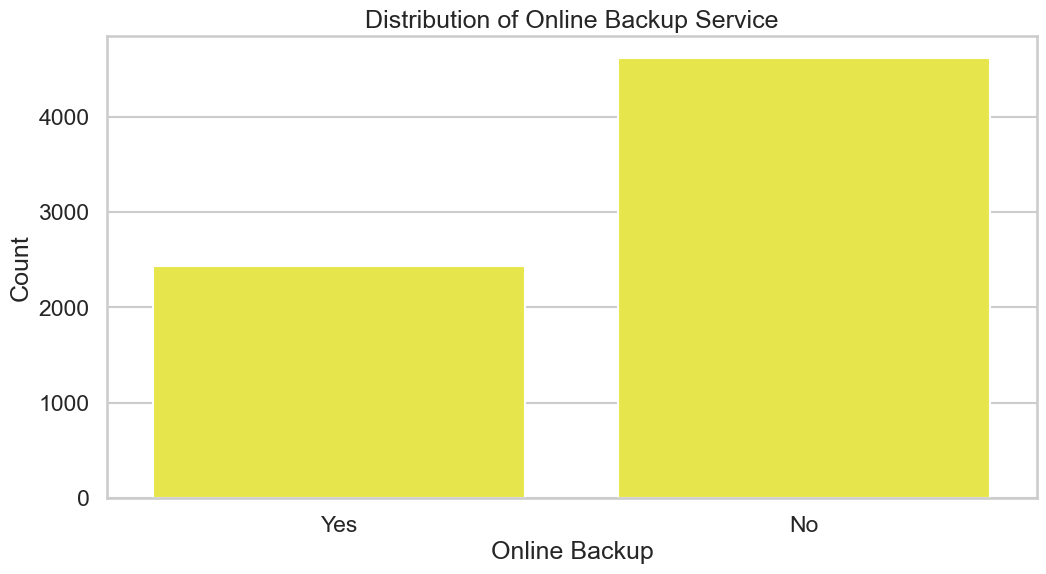

In [44]:
# OnlineBackup
plt.figure(figsize=(12, 6))
sns.countplot(x='OnlineBackup', data=df,color='#ffff33')
plt.title('Distribution of Online Backup Service')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.show()

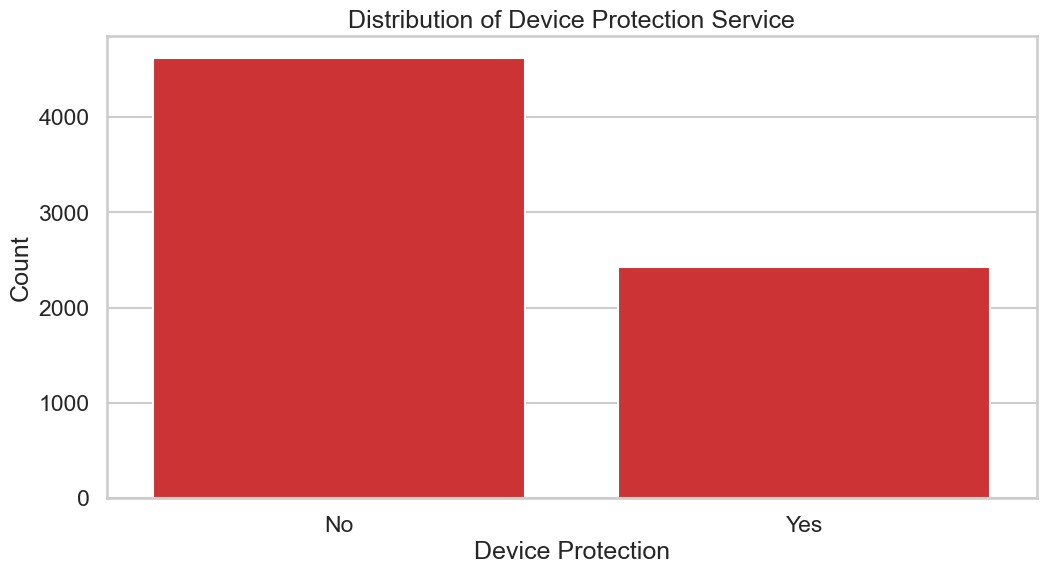

In [45]:
# DeviceProtection
plt.figure(figsize=(12, 6))
sns.countplot(x='DeviceProtection', data=df, color ='#e41a1c')
plt.title('Distribution of Device Protection Service')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

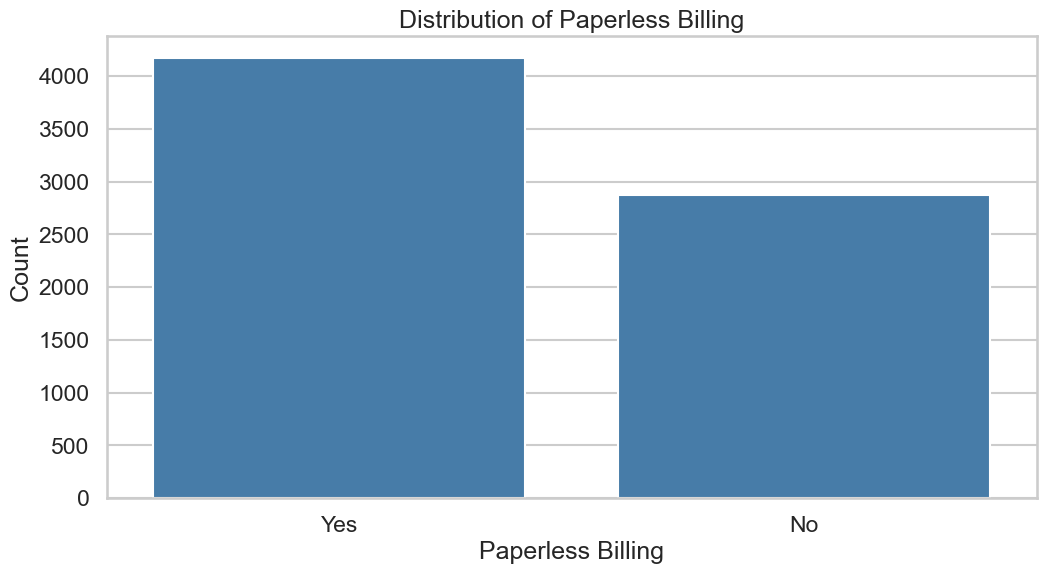

In [46]:
# PaperlessBilling
plt.figure(figsize=(12, 6))
sns.countplot(x='PaperlessBilling', data=df, color='#377eb8')
plt.title('Distribution of Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()


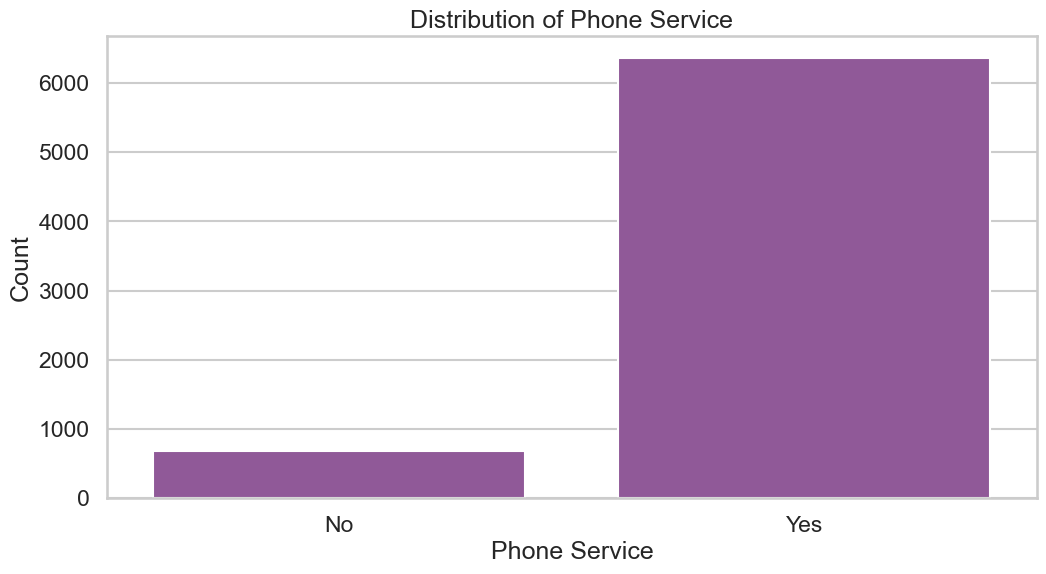

In [47]:
# PhoneService
plt.figure(figsize=(12, 6))
sns.countplot(x='PhoneService', data=df, color='#984ea3')
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()



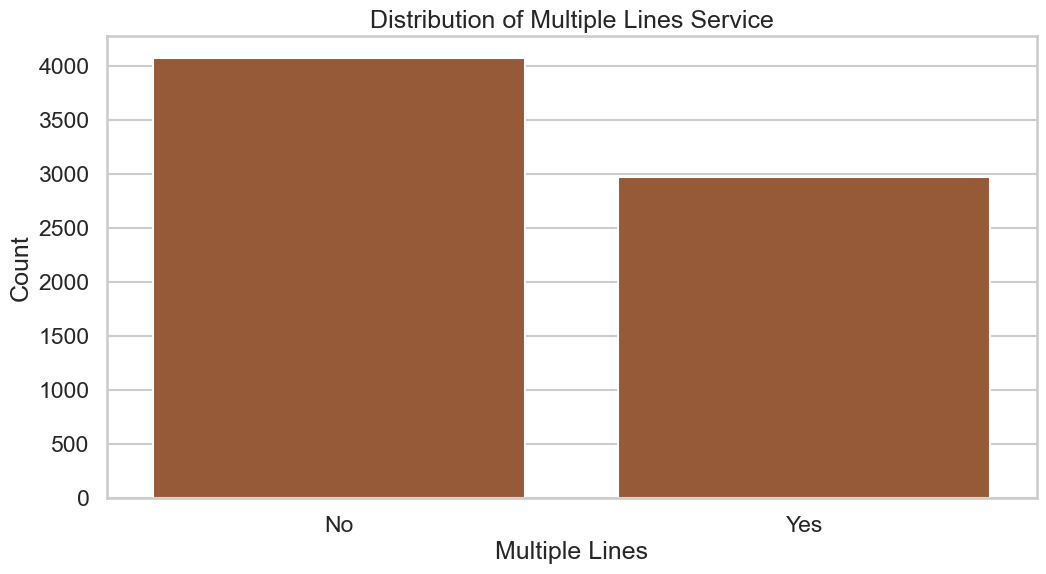

In [48]:
# MultipleLines
plt.figure(figsize=(12, 6))
sns.countplot(x='MultipleLines', data=df, color='#a65628')
plt.title('Distribution of Multiple Lines Service')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

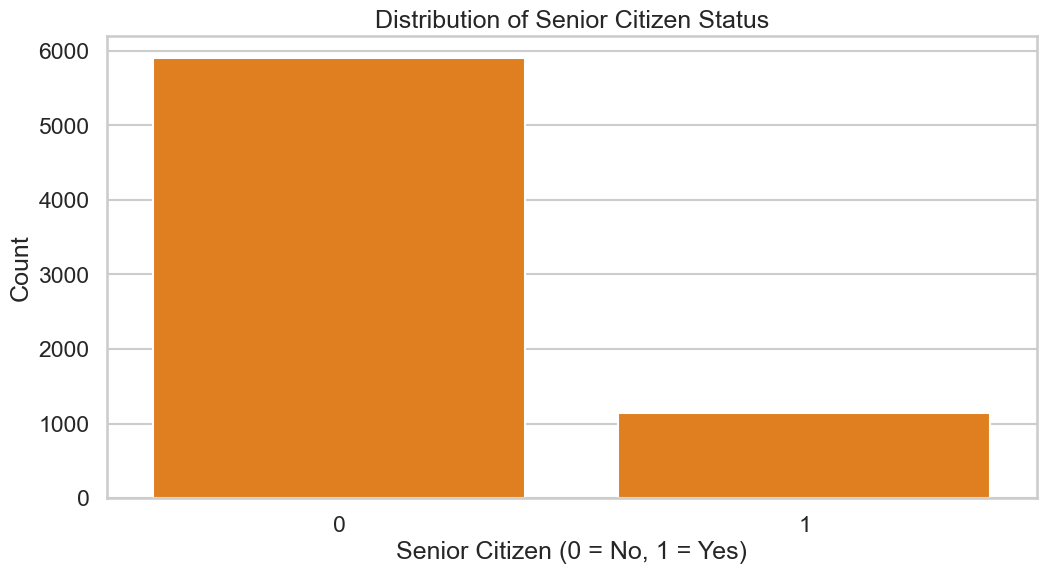

In [49]:
# SeniorCitizen
plt.figure(figsize=(12, 6))
sns.countplot(x='SeniorCitizen', data=df, color='#ff7f00')
plt.title('Distribution of Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



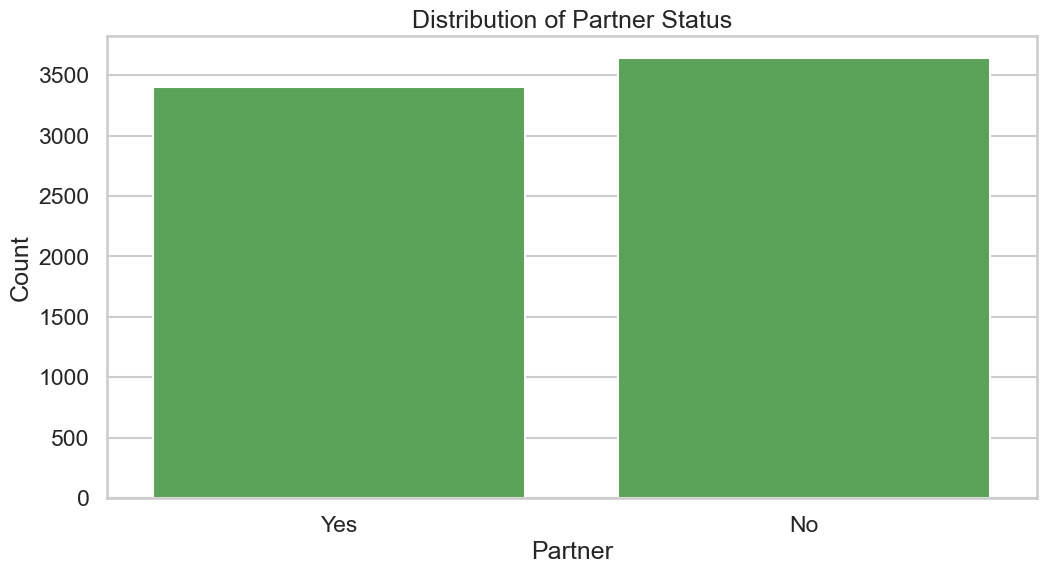

In [50]:
# Partner
plt.figure(figsize=(12, 6))
sns.countplot(x='Partner', data=df, color='#4daf4a')
plt.title('Distribution of Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()



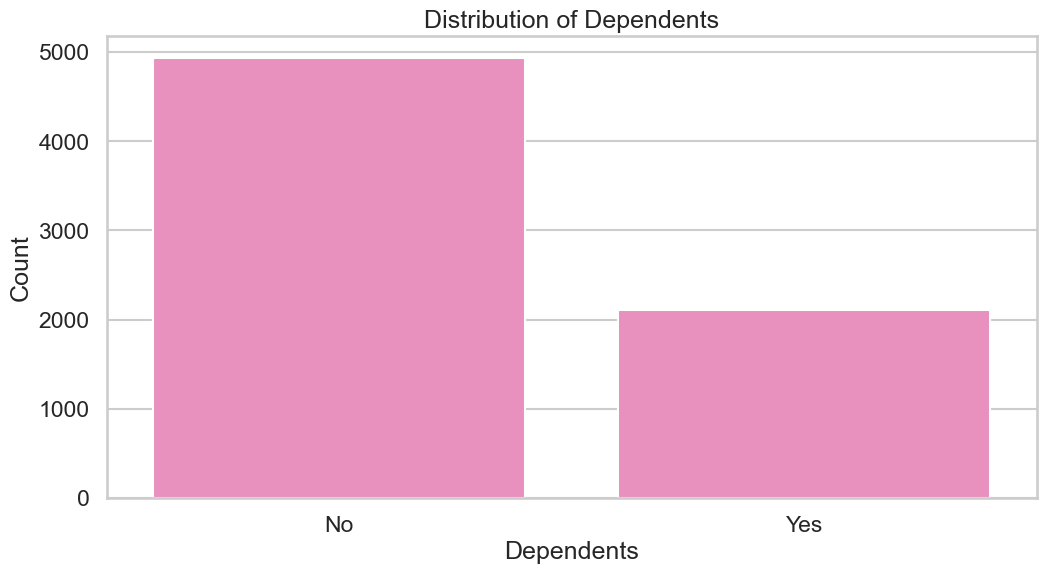

In [51]:
# Dependents
plt.figure(figsize=(12, 6))
sns.countplot(x='Dependents', data=df, color='#f781bf')
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()
